IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

DATA LOADING AND PREPROCESSING

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


SELECTING THE RELEVANT ATTRIBUTES FOR CUSTOMER SEGMENTATION

In [ ]:
X = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

SCALING THE DATA BEFORE APPLYING KMEANS ALGORITHM

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

DETERMINING THE OPTIMAL NUMBER OF CLUSTERS USING THE ELBOW METHOD

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

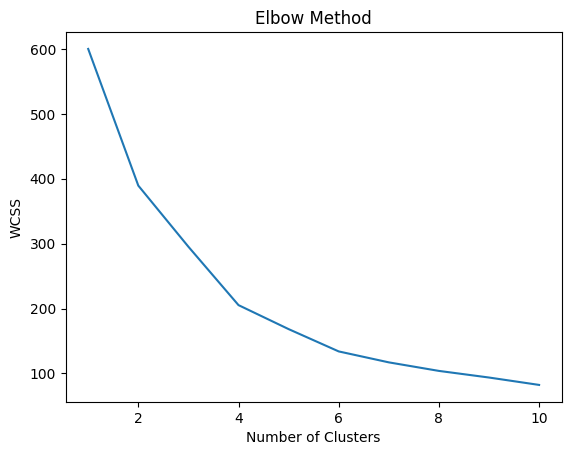

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

APPLYING THE KMEANS ALGORITHM WITH 5 CLUSTERS

In [ ]:
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ADDING THE CLUSTER LABELS TO THE ORIGINAL DATASET

In [ ]:
df["Cluster"] = y_pred

DISPLAYING THE NUMBER OF CUSTOMERS AND THEIR IDs IN EACH OF THE FIVE CLUSTERS GENERATED BY THE K-MEANS CLUSTERING ALGORITHM

In [ ]:
cust1 = df[df["Cluster"]==0]
print('Number of Customers in Cluster 0:', len(cust1))
print('Customer IDs in Cluster 0:', cust1["CustomerID"].values)

cust2 = df[df["Cluster"]==1]
print('Number of Customers in Cluster 1:', len(cust2))
print('Customer IDs in Cluster 1:', cust2["CustomerID"].values)

cust3 = df[df["Cluster"]==2]
print('Number of Customers in Cluster 2:', len(cust3))
print('Customer IDs in Cluster 2:', cust3["CustomerID"].values)

cust4 = df[df["Cluster"]==3]
print('Number of Customers in Cluster 3:', len(cust4))
print('Customer IDs in Cluster 3:', cust4["CustomerID"].values)

cust5 = df[df["Cluster"]==4]
print('Number of Customers in Cluster 4:', len(cust5))
print('Customer IDs in Cluster 4:', cust5["CustomerID"].values)

Number of Customers in Cluster 0: 39
Customer IDs in Cluster 0: [113 122 125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155
 157 159 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193
 195 197 199]
Number of Customers in Cluster 1: 20
Customer IDs in Cluster 1: [ 3  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]
Number of Customers in Cluster 2: 54
Customer IDs in Cluster 2: [  1   2   4   5   6   8  10  12  14  16  18  20  22  24  26  28  30  32
  34  36  38  40  42  44  46  48  49  50  52  53  59  62  66  69  70  76
  79  82  85  88  89  92  95  96  98 100 101 104 106 112 114 115 116 121]
Number of Customers in Cluster 3: 47
Customer IDs in Cluster 3: [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103
 105 107 108 109 110 111 117 118 119 120 161]
Number of Customers in Cluster 4: 40
Customer IDs in Cluster 4: [123 124 126 128 130 132 134 136 138 140 142 1

CONVERTING THE NEW CUSTOMER DATA INTO A NUMPY ARRAY

In [ ]:
new_customer_data = np.array([[25, 50, 70]])

SCALING THE NEW CUSTOMER DATA USING THE SAME SCALER USED FOR TRAINING DATA

In [ ]:
new_customer_data_scaled = scaler.transform(new_customer_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


PREDICTING THE CLUSTER FOR THE NEW CUSTOMER DATA

In [ ]:
new_customer_cluster = kmeans.predict(new_customer_data_scaled)

PRINTING THE PREDICTED CLUSTER

In [ ]:
print("\n The Predicted Cluster",new_customer_cluster)


 The Predicted Cluster [2]
